In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [3]:
with open('cluster_pkl/clustering_embeddings.pkl', 'rb') as file:
            clustered_embeddings = pickle.load(file)

In [15]:
# replicate softmax with initialization of weights as centroids of clusters
def softmax_rep(layer):
    clusters = [np.array(c) for c in clustered_embeddings[layer].values()]
    centroids = [np.mean(c, axis = 0) for c in clusters]
    hit_count = 0
    n = sum([c.shape[0] for c in clusters])

    for i, c in enumerate(clusters):
        for j in range(c.shape[0]):
            dots = np.array([np.dot(c[j, :], centroid) for centroid in centroids])
            softmax_cluster = np.argmax(dots)
            if softmax_cluster == i:
                hit_count += 1

    
    return hit_count / n

In [17]:
for layer in sorted(list(clustered_embeddings.keys())):
    print(f'Layer: {layer}, softmax hit: {softmax_rep(layer)}')

Layer: 0, softmax hit: 0.57
Layer: 1, softmax hit: 0.571
Layer: 2, softmax hit: 0.42
Layer: 3, softmax hit: 0.567
Layer: 4, softmax hit: 0.58
Layer: 5, softmax hit: 0.578
Layer: 6, softmax hit: 0.61
Layer: 7, softmax hit: 0.56
Layer: 8, softmax hit: 0.581
Layer: 9, softmax hit: 0.583
Layer: 10, softmax hit: 0.583
Layer: 11, softmax hit: 0.588
Layer: 12, softmax hit: 0.571
Layer: 13, softmax hit: 0.596
Layer: 14, softmax hit: 0.57
Layer: 15, softmax hit: 0.592
Layer: 16, softmax hit: 0.577
Layer: 17, softmax hit: 0.55
Layer: 18, softmax hit: 0.556
Layer: 19, softmax hit: 0.557
Layer: 20, softmax hit: 0.538
Layer: 21, softmax hit: 0.498
Layer: 22, softmax hit: 0.524
Layer: 23, softmax hit: 0.549


In [12]:
# compute inertia on clusters of embeddings

def inertia(clusters):
    total_inertia = 0
    for cluster in clusters:
        centroid = np.mean(cluster, axis = 0)
        inertia = sum(np.sum((np.array(point) - centroid) ** 2) for point in cluster)
        total_inertia += inertia
    return total_inertia

def r2_layer(layer):
    clusters = [np.array(c) for c in clustered_embeddings[layer].values()]
    inertia_ = inertia(clusters)
    r2_ = r2(clusters)
    return r2_, inertia_

def r2(clusters):
    # stack vectors
    vectors = np.vstack(clusters)

    n = vectors.shape[0]
    inertia_avg = inertia(clusters) / n

    global_average = vectors.sum(axis=0) / n
    global_distance_squared_avg = np.sum(((vectors - global_average)**2)) / n

    R2 = 1 - inertia_avg / global_distance_squared_avg
    return R2



In [13]:
r2_layer(8)

(0.018529862261037255, 434607.0)

In [14]:
for layer in sorted(list(clustered_embeddings.keys())):
    print(f'Layer: {layer}, R2: {r2_layer(layer)[0]}')
                    

Layer: 0, R2: 0.010439297780132528
Layer: 1, R2: 0.013509113173788556
Layer: 2, R2: 0.012388323464719297
Layer: 3, R2: 0.016201021240980884
Layer: 4, R2: 0.0184546799978621
Layer: 5, R2: 0.01788069973402029
Layer: 6, R2: 0.018357225508440322
Layer: 7, R2: 0.01903963655096408
Layer: 8, R2: 0.018529862261037255
Layer: 9, R2: 0.019414058565265457
Layer: 10, R2: 0.01890736163845741
Layer: 11, R2: 0.019372740619365558
Layer: 12, R2: 0.018991513733007892
Layer: 13, R2: 0.019233632286508318
Layer: 14, R2: 0.02064955376952826
Layer: 15, R2: 0.02088701281345673
Layer: 16, R2: 0.019693616704422823
Layer: 17, R2: 0.02019805315639489
Layer: 18, R2: 0.019580296304296807
Layer: 19, R2: 0.019371871439170296
Layer: 20, R2: 0.018808016604449196
Layer: 21, R2: 0.018771276484294885
Layer: 22, R2: 0.02125180374557123
Layer: 23, R2: 0.02311273213959686


In [10]:
embeddings = np.array(clustered_embeddings[8][5]) # random cluster for layer 8

In [13]:
embeddings.shape

(178, 2048)

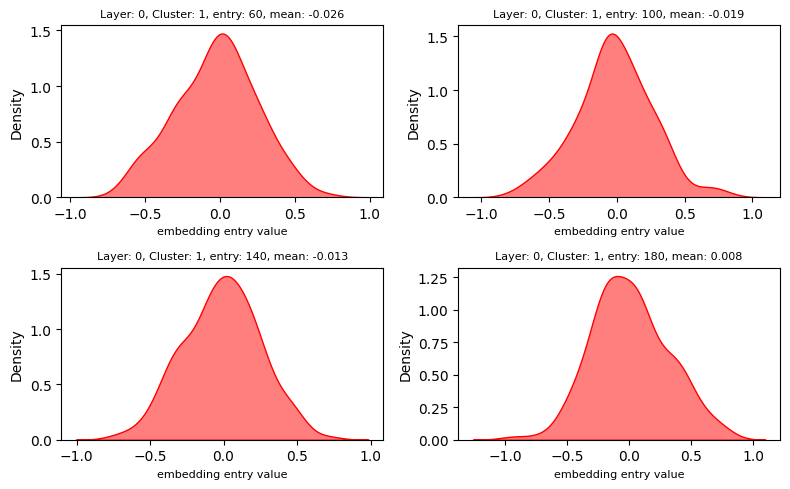

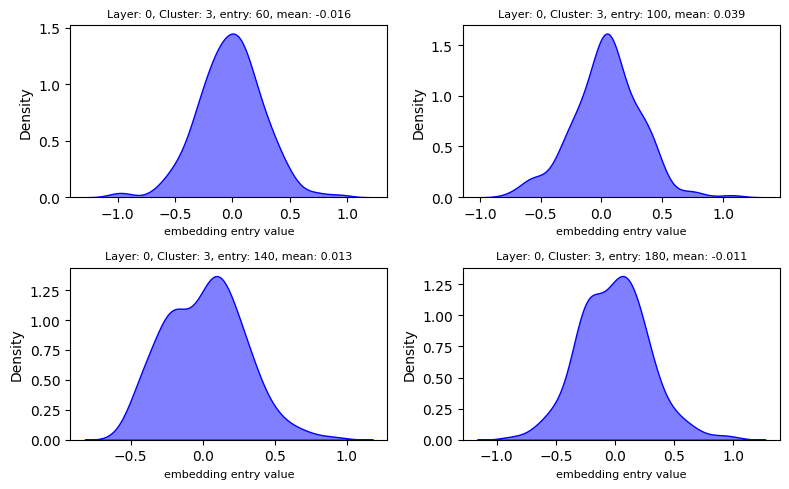

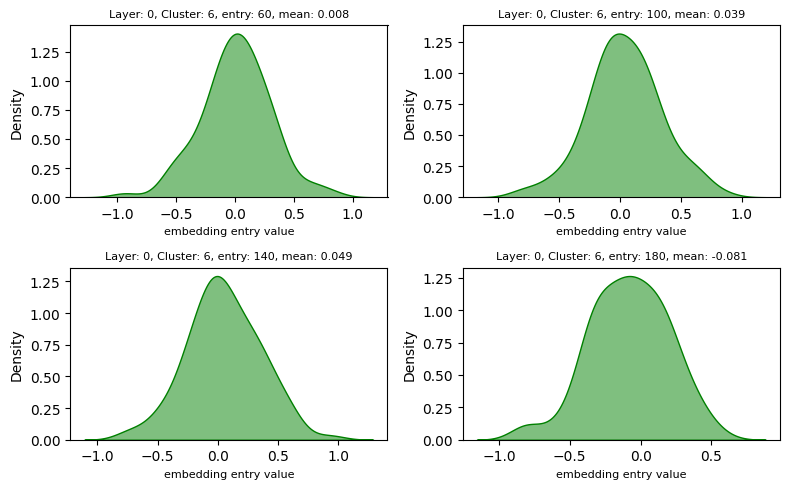

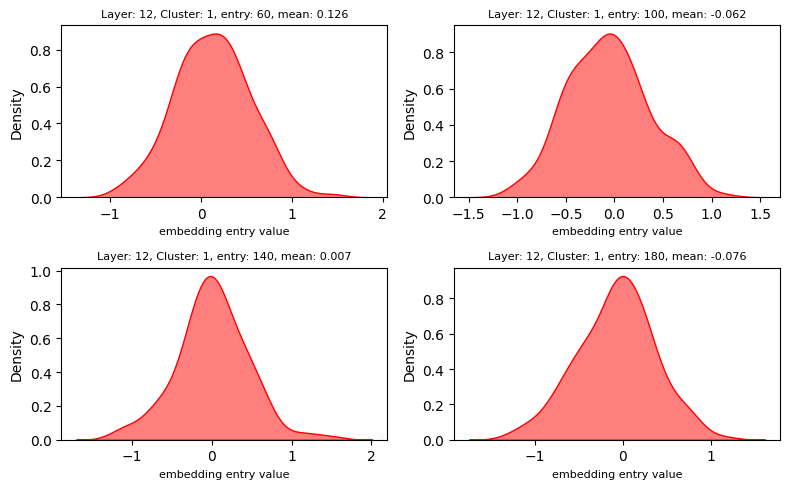

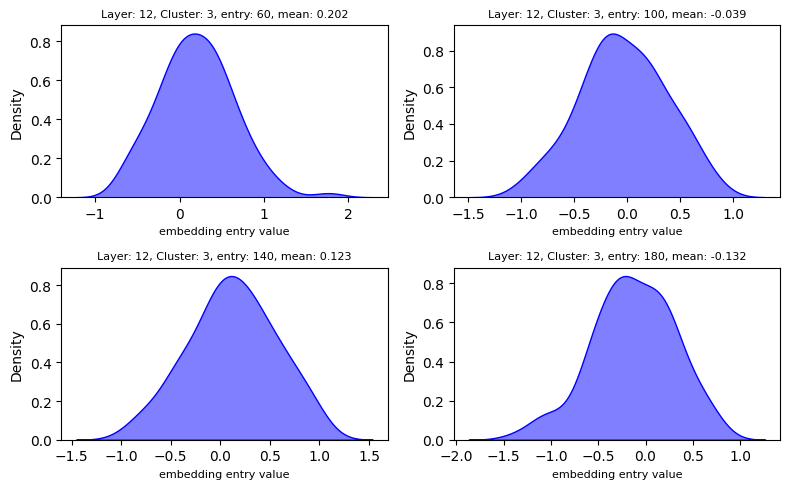

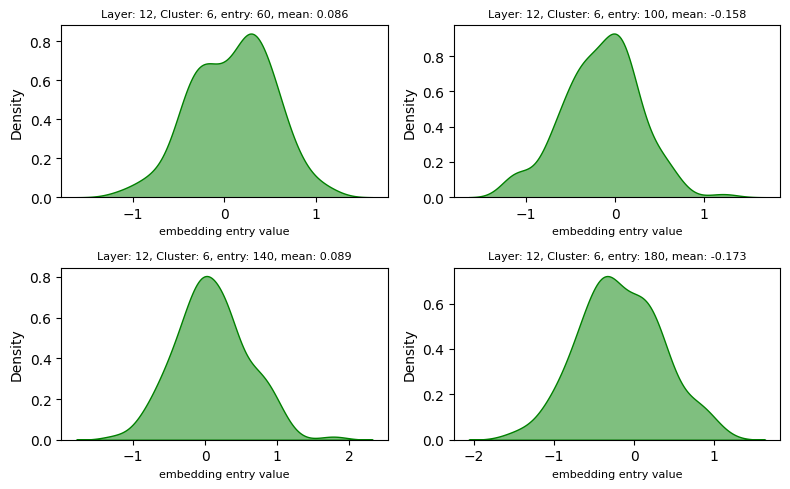

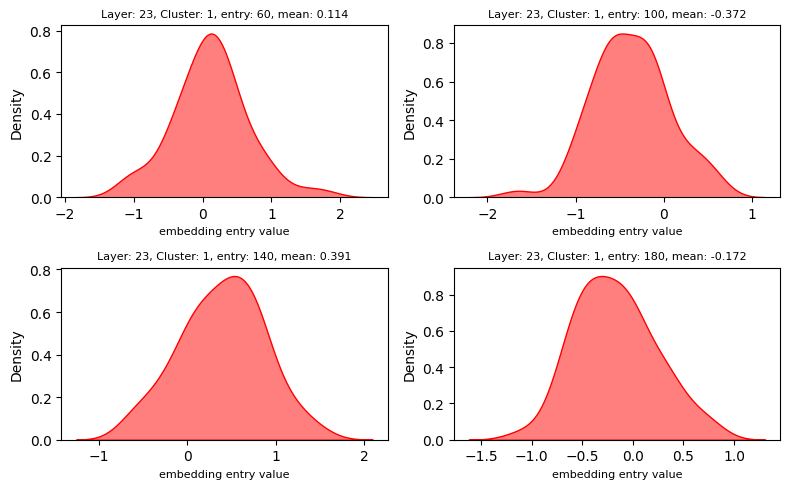

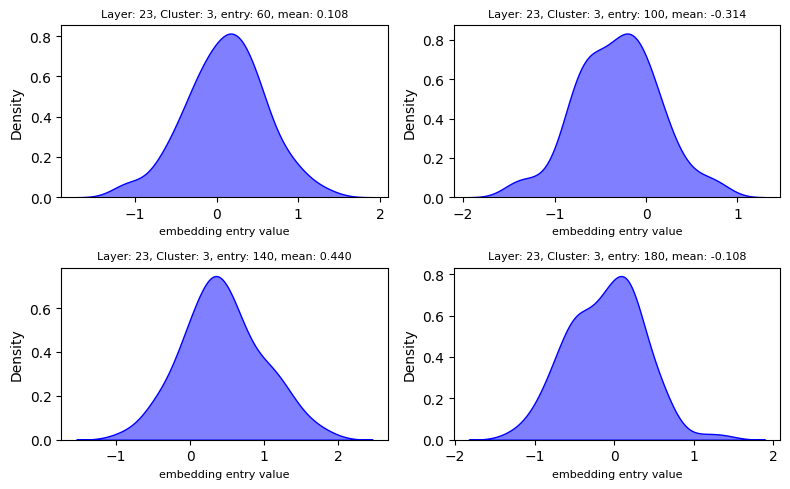

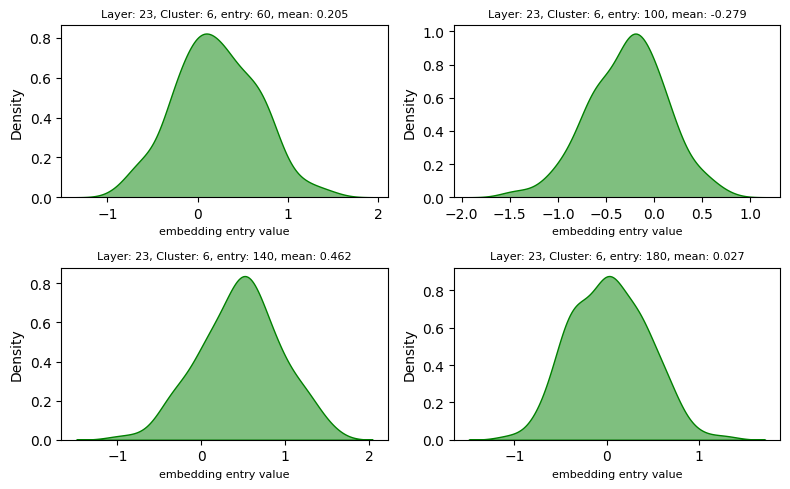

In [38]:
"""
Do a density plot, to see if there is a noticeably difference in the structure of distribution of the input embeddings for each cluster
pick some indices, take the embedding values for that index for different clusters for same layer, and compare the densities
"""

color = ["r", "b", "g"] 
def density_plot(layer, cluster, c):
    fig, axs = plt.subplots(2, 2, figsize=(8, 5))  # Creates a grid of 2x2 for the plots
    axs = axs.flatten()  # Flatten the array to easily iterate over it
    for index, i in enumerate([60, 100, 140, 180]):  # Use enumerate for index
        embeddings = np.array(clustered_embeddings[layer][cluster]) 
        embedding_row = embeddings[:, i]
        sns.kdeplot(embedding_row, fill=True, color=color[c], alpha=0.5, ax=axs[index])
        axs[index].set_title(f'Layer: {layer}, Cluster: {cluster}, entry: {i}, mean: {np.mean(embedding_row):.3f}', fontsize = 8)
        axs[index].set_xlabel('embedding entry value', fontsize=8)
    
    plt.tight_layout()  # Adjusts subplot params so that subplots are nicely fit in the figure area
    plt.show()

for layer in [0, 12, 23]:
    for i, cluster in enumerate([1,3,6]):
        density_plot(layer, cluster, i)